# 一、新闻采集统计

In [5]:
import os
import pandas as pd

def read_file(path):
    """ 对含Tab的标题的鲁棒加载
    """
    with open(path, 'r') as f:
        lines = f.readlines()

    lines_split = []
    for line in lines:
        line = line.strip()
        line_split = line.split('\t')
        # 若新闻标题包含Tab (导致列数不匹配)
        if len(line_split) > 2:
            date = line_split[0]
            title = '\t'.join(line_split[1:])
            line_split = [date, title]
        lines_split.append(line_split)
    code_file = pd.DataFrame(lines_split, columns=['date', 'news_title'])
    return code_file

news_base = "/data1/brian/Quant/news_sentiment_analysis/1-news_collecting/stock_news"
news_count = 0
codes_count = 0
for p in os.listdir(news_base):
    news_dir = os.path.join(news_base, p)
    if os.path.isfile(news_dir):
        try:
            news_titles = pd.read_csv(news_dir)
        except:
            news_titles = read_file(news_dir)
        news_count += len(news_titles)
        codes_count += 1
print("采集股票总数: {}, 新闻总数: {}".format(codes_count, news_count))

采集股票总数: 5108, 新闻总数: 6503115


interdf1

In [7]:
news_count_filtered = 0
codes_count_filtered = 0
filtered_codes = pd.read_csv("/data1/brian/Quant/dataset/all_codes_before20200630_filtered.csv")['code'].astype(str).str.zfill(6).tolist()
for p in os.listdir(news_base):
    news_dir = os.path.join(news_base, p)
    if os.path.isfile(news_dir):
        code = p.split('.')[0]
        if len(set(filtered_codes+[code])) == len(filtered_codes): # 在filtered_codes里面
            try:
                news_titles = pd.read_csv(news_dir)
            except:
                news_titles = read_file(news_dir)
            news_count_filtered += len(news_titles)
            codes_count_filtered += 1
print("筛选后采集股票总数: {}, 新闻总数: {}".format(codes_count_filtered, news_count_filtered))

筛选后采集股票总数: 4565, 新闻总数: 6244361


In [9]:
news_count_filtered = 0
codes_count_filtered = 0
filtered_codes = pd.read_csv("/data1/brian/Quant/dataset/all_codes_before20200630_filtered.csv")['code'].astype(str).str.zfill(6).tolist()
segs_news_count_filterd = {}
segs_codes_count_filtered = {}
for p in os.listdir(news_base):
    news_dir = os.path.join(news_base, p)
    if os.path.isfile(news_dir):
        code = p.split('.')[0]
        if len(set(filtered_codes+[code])) == len(filtered_codes): # 在filtered_codes里面
            seg = code[:2]
            try:
                news_titles = pd.read_csv(news_dir)
            except:
                news_titles = read_file(news_dir)
            news_count_filtered += len(news_titles)
            codes_count_filtered += 1
            try:
                segs_news_count_filterd[seg] += len(news_titles)
            except KeyError:
                segs_news_count_filterd[seg] = len(news_titles)
            try:
                segs_codes_count_filtered[seg] += 1
            except KeyError:
                segs_codes_count_filtered[seg] = 1

print("筛选后采集股票总数: {}, 新闻总数: {}".format(codes_count_filtered, news_count_filtered))
print("采集后分块股票数目: {}, 分块新闻数目: {}".format(segs_codes_count_filtered, segs_news_count_filterd))

筛选后采集股票总数: 4565, 新闻总数: 6244361
采集后分块股票数目: {'30': 1132, '00': 1398, '60': 1606, '68': 429}, 分块新闻数目: {'30': 1324907, '00': 2090572, '60': 2279182, '68': 549700}


In [91]:
6244361 / 4565

1367.8775465498356

In [19]:
df1 = pd.DataFrame(segs_codes_count_filtered, index=list(range(1))).T
df1.rename(columns={0: 'codes_count'}, inplace=True)
df2 = pd.DataFrame(segs_news_count_filterd, index=list(range(1))).T
df2.rename(columns={0: 'news_count'}, inplace=True)
filtered_counts = pd.concat([df1, df2], axis=1)
filtered_counts

,codes_count,news_count
30,1132,1324907
00,1398,2090572
60,1606,2279182
68,429,549700


In [29]:
filtered_counts.index.tolist()

['30', '00', '60', '68']

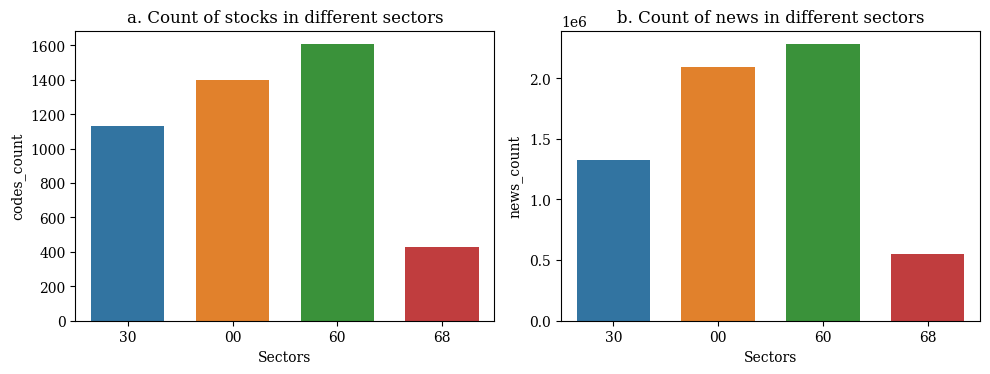

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# 创建一个包含两3个子图的画布
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# 绘制第一个子图的条形图
sns.barplot(x=filtered_counts.index.tolist(), y='codes_count', data=filtered_counts, ax=ax1, width=0.7)
ax1.set_title('a. Count of stocks in different sectors')
ax1.set_xlabel('Sectors')
# ax1.set_ylabel('Count')

# 绘制第二个子图的条形图
sns.barplot(x=filtered_counts.index.tolist(), y='news_count', data=filtered_counts, ax=ax2, width=0.7)
ax2.set_title('b. Count of news in different sectors')
ax2.set_xlabel('Sectors')
# ax2.set_ylabel('Count')
# 显示图形
plt.tight_layout()
plt.show()
fig.savefig('/data1/brian/Quant/paper_figs/crawling_counts.jpg', dpi=512, bbox_inches='tight')

# 二、排序结果比对

In [88]:
# 标题+摘要 情感评分排序
senti_rank = pd.read_csv("/data1/brian/Quant/news_sentiment_analysis/4-sentiment_analyzing/senti_postive_rank.csv")
codes_filtered = pd.read_csv("/data1/brian/Quant/dataset/all_codes_before20200630_filtered.csv")
senti_rank = pd.merge(senti_rank, codes_filtered, on='code', how='right')
senti_rank['code'] = senti_rank['code'].astype(str).str.zfill(6)
senti_rank = senti_rank.sort_values(by='positive_ratio', ascending=False)
senti_rank['senti_rank'] = list(range(1, len(senti_rank)+1))
# 标题 情感评分排序
senti_rank_title = pd.read_csv("/data1/brian/Quant/news_sentiment_analysis/4-sentiment_analyzing/senti_postive_rank_title.csv")
codes_filtered = pd.read_csv("/data1/brian/Quant/dataset/all_codes_before20200630_filtered.csv")
senti_rank_title = pd.merge(senti_rank_title, codes_filtered, on='code', how='right')
senti_rank_title['code'] = senti_rank_title['code'].astype(str).str.zfill(6)
senti_rank_title = senti_rank_title.sort_values(by='positive_ratio', ascending=False)
senti_rank_title['senti_rank'] = list(range(1, len(senti_rank_title)+1))
# 基本面分析排序
basic_rank = pd.read_csv("/data1/brian/Quant/dataset/stockscore2.csv")
basic_rank['V1'] = basic_rank['V1'].map(lambda x: x[1:])
basic_rank['V2'] = basic_rank['V2'].astype(float)
basic_rank.rename(columns={'V1': 'code', 'V2': 'score'}, inplace=True)
basic_rank = basic_rank.sort_values(by='score', ascending=False)
basic_rank = basic_rank[['code', 'score']]
basic_rank['basic_rank'] = list(range(1, len(basic_rank)+1))

idx = 500
drop68 = False # True
if drop68:
    senti_rank = senti_rank[~senti_rank['code'].map(lambda x: True if x[:2]=='68' else False)]
    senti_rank_title = senti_rank_title[~senti_rank_title['code'].map(lambda x: True if x[:2]=='68' else False)]

# 标题+摘要 情感评分排序 & 基本面分析
intersect1 = set(senti_rank.iloc[:idx]['code']).intersection((basic_rank.iloc[:idx]['code']))
# 标题 情感评分排序 & 基本面分析
intersect2 = set(senti_rank_title.iloc[:idx]['code']).intersection((basic_rank.iloc[:idx]['code']))
# 标题+摘要 情感评分排序 & 标题 情感评分排序
intersect3 = set(senti_rank_title.iloc[:idx]['code']).intersection((senti_rank.iloc[:idx]['code']))
print(len(intersect1), len(intersect2), len(intersect3))
interdf1 = pd.merge(senti_rank, basic_rank, on='code')
interdf1 = interdf1[interdf1['code'].isin(intersect1)]
interdf2 = pd.merge(senti_rank_title, basic_rank, on='code')
interdf2 = interdf2[interdf2['code'].isin(intersect2)]
if not drop68:
    interdf1.to_csv("/data1/brian/Quant/dataset/inter_{}_rank_title_summary_basic.csv".format(len(intersect1)), index=False)
    interdf2.to_csv("/data1/brian/Quant/dataset/inter_{}_rank_title_basic.csv".format(len(intersect2)), index=False)
else:
    interdf1.to_csv("/data1/brian/Quant/dataset/inter_{}_rank_title_summary_basic_drop68.csv".format(len(intersect1)), index=False)
    interdf2.to_csv("/data1/brian/Quant/dataset/inter_{}_rank_title_basic_drop68.csv".format(len(intersect2)), index=False)

43 42 333


In [83]:
sum(senti_rank.iloc[:idx]['code'].map(lambda x: True if x[:2]=='68' else False))

92

In [89]:
sum(senti_rank_title.iloc[:idx]['code'].map(lambda x: True if x[:2]=='68' else False))

95

In [90]:
interdf1

,code,positive_ratio,name,senti_rank,score,basic_rank
0,000404,0.982394,长虹华意,2,0.036276,455
15,600458,0.942029,时代新材,19,0.037805,393
16,301160,0.934256,翔楼新材,25,0.037018,422
26,605158,0.914773,华达新材,44,0.035206,498
50,603527,0.897810,众源新材,77,0.049059,186
53,600501,0.895623,航天晨光,81,0.035188,500
73,002988,0.881533,豪美新材,106,0.040586,313
86,300986,0.868988,志特新材,128,0.035229,497
92,600551,0.866292,时代出版,135,0.036529,441
97,600133,0.862191,东湖高新,143,0.036912,425


# 三、情感预测模型微调可视化

In [107]:
logfile = "/data1/brian/Quant/news_sentiment_analysis/3-sentiment_finetuning/outputs/2023-05-24-19:18:16/logs.txt"
with open(logfile, 'r') as f:
    logs = f.readlines()

logs = pd.DataFrame([[ll.strip().replace(',', '') for ll in l.split(' ') ]for l in logs[:-1]])[[3, 5, 9, 11]].astype(float)

In [120]:
logs

,3,5,9,11
0,0.5710,0.6995,0.4426,0.8275
1,0.3664,0.8516,0.3521,0.8500
2,0.3004,0.8848,0.3220,0.8633
3,0.2598,0.9032,0.2906,0.8850
4,0.2234,0.9191,0.2976,0.8858
5,0.1974,0.9323,0.2630,0.9017
6,0.1677,0.9443,0.2733,0.8983
7,0.1481,0.9496,0.2839,0.8975
8,0.1236,0.9627,0.2697,0.9075
9,0.0980,0.9734,0.2823,0.9108


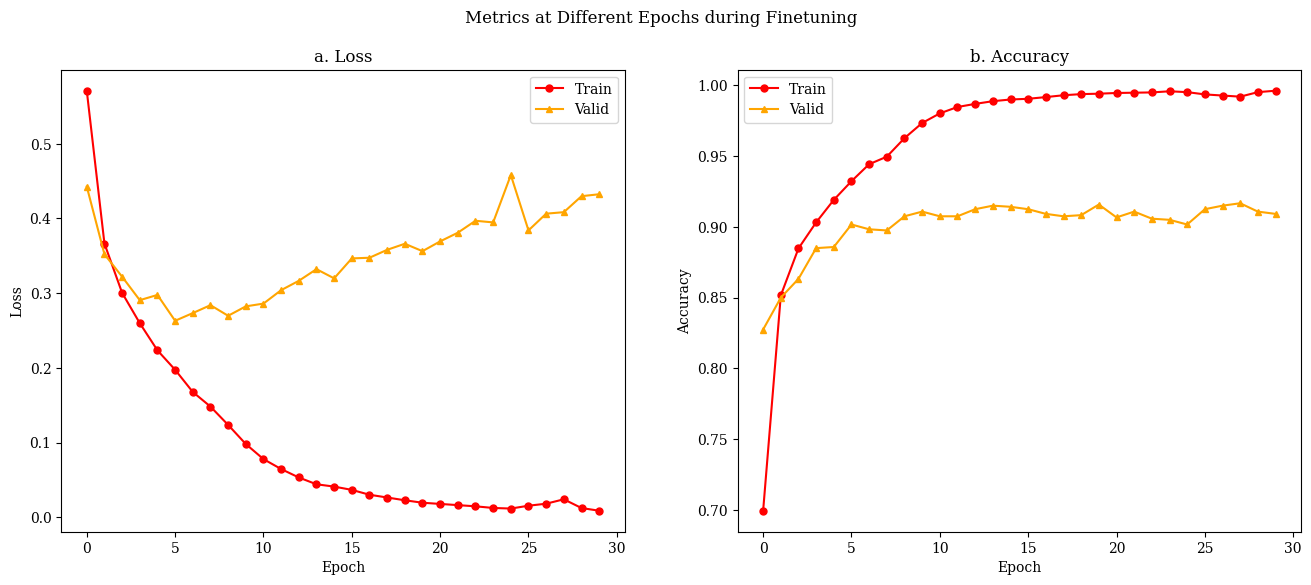

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
x = list(range(len(logs)))
y1 = logs[3].tolist()
y2 = logs[5].tolist()
y3 = logs[9].tolist()
y4 = logs[11].tolist()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# 绘制图形
ax1.plot(x, y1, color='red', marker='o', markersize=5, label='Train')
ax1.plot(x, y3, color='orange', marker='^', markersize=5, label='Valid')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('a. Loss')
ax1.legend()

ax2.plot(x, y2, color='red', marker='o', markersize=5, label='Train')
ax2.plot(x, y4, color='orange', marker='^', markersize=5, label='Valid')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('b. Accuracy')
ax2.legend()
# 添加图例

# 添加标题和坐标轴标签
plt.suptitle('Metrics at Different Epochs during Finetuning')
plt.savefig('/data1/brian/Quant/paper_figs/finetuning_curves.jpg', dpi=512, bbox_inches='tight')

# 四、检验微调效果

In [144]:
data = "/data1/brian/Quant/news_sentiment_analysis/3-sentiment_finetuning/ChnSentiCrop/test.csv"
data = pd.read_csv(data).iloc[:100]
labels, texts = data ['label'].tolist(), data ['text'].tolist()

In [145]:
import torch
from transformers import AutoTokenizer 
from transformers import AutoModel, AutoConfig, AutoModelForSequenceClassification

model_config = AutoConfig.from_pretrained("voidful/albert_chinese_small_sentiment", output_hidden_states=True)
BERT = AutoModelForSequenceClassification.from_pretrained("voidful/albert_chinese_small_sentiment", config=model_config)
tokenizer = AutoTokenizer.from_pretrained("voidful/albert_chinese_small_sentiment")

inputs = tokenizer.batch_encode_plus(texts, return_tensors="pt", padding=True, truncation=True, max_length=128)
outputs = BERT(**inputs)
logits = torch.softmax(outputs.logits, dim=-1)
pred = torch.argmax(logits, dim=-1)
pred

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])

In [146]:
model_path = "/data1/brian/Quant/news_sentiment_analysis/3-sentiment_finetuning/outputs/2023-05-24-19:18:16/albert_finetuned_ep27"
model_config = AutoConfig.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path, config=model_config)
tokenizer = AutoTokenizer.from_pretrained(model_path)

inputs = tokenizer.batch_encode_plus(texts, return_tensors="pt", padding=True, truncation=True, max_length=128)
outputs = model(**inputs)
logits_ft = torch.softmax(outputs.logits, dim=-1)
pred_ft = torch.argmax(logits_ft, dim=-1)

In [151]:
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import accuracy_score

m1 = spearmanr(labels, pred)[0], pearsonr(labels, pred)[0], accuracy_score(labels, pred)
m2 = spearmanr(labels, pred_ft)[0], pearsonr(labels, pred_ft)[0], accuracy_score(labels, pred_ft)
print(*m1)
print(*m2)

-0.16560969387716504 -0.16560969387716504 0.5
0.5296040376003761 0.5296040376003761 0.76


In [152]:
metrics = pd.DataFrame(
    [[-0.166, 'Only PT', 'Spearman'],
     [-0.166, 'Only PT', 'Pearson'],
     [0.5, 'Only PT', 'Accuracy'],
     [0.530, 'With FT', 'Spearman'],
     [0.530, 'With FT', 'Pearson'],
     [0.75, 'With FT', 'Accuracy']],
     columns=['Value', 'Model type', 'Metric']
)

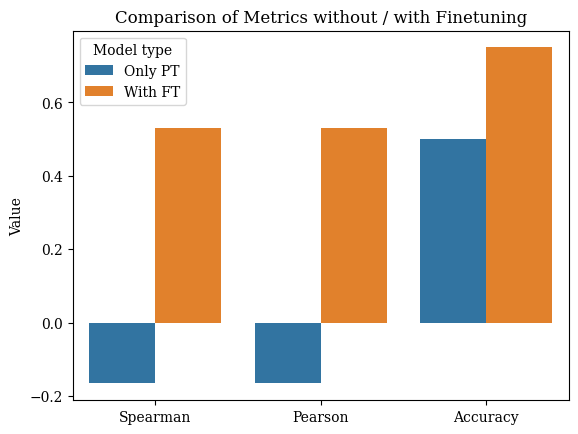

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt


# 使用Seaborn绘制柱状图
sns.barplot(x='Metric', y='Value', hue='Model type', data=metrics)

# 添加标题和标签
plt.title('Comparison of Metrics without / with Finetuning')
plt.xlabel('')
plt.ylabel('Value')

plt.savefig('/data1/brian/Quant/paper_figs/finetuing_comp.jpg', dpi=512, bbox_inches='tight')

In [180]:
stocks_news = ["*ST高升董事许磊已减持255.23万股 拟继续减持不超335.73万股",
                "光大证券维持中联重科买入评级 预计2023年净利润同比增长53.94%",
                "江铃汽车05月08日获深股通增持8.15万股"]
inputs = tokenizer.batch_encode_plus(stocks_news, return_tensors="pt", padding=True, truncation=True, max_length=128)
o1 = BERT(**inputs)
l1 = torch.softmax(o1.logits, dim=-1)
o2 = model(**inputs)
l2 = torch.softmax(o2.logits, dim=-1)

In [181]:
l1, l2

(tensor([[0.6119, 0.3881],
         [0.5851, 0.4149],
         [0.5998, 0.4002]], grad_fn=<SoftmaxBackward0>),
 tensor([[0.9591, 0.0409],
         [0.0569, 0.9431],
         [0.2071, 0.7929]], grad_fn=<SoftmaxBackward0>))

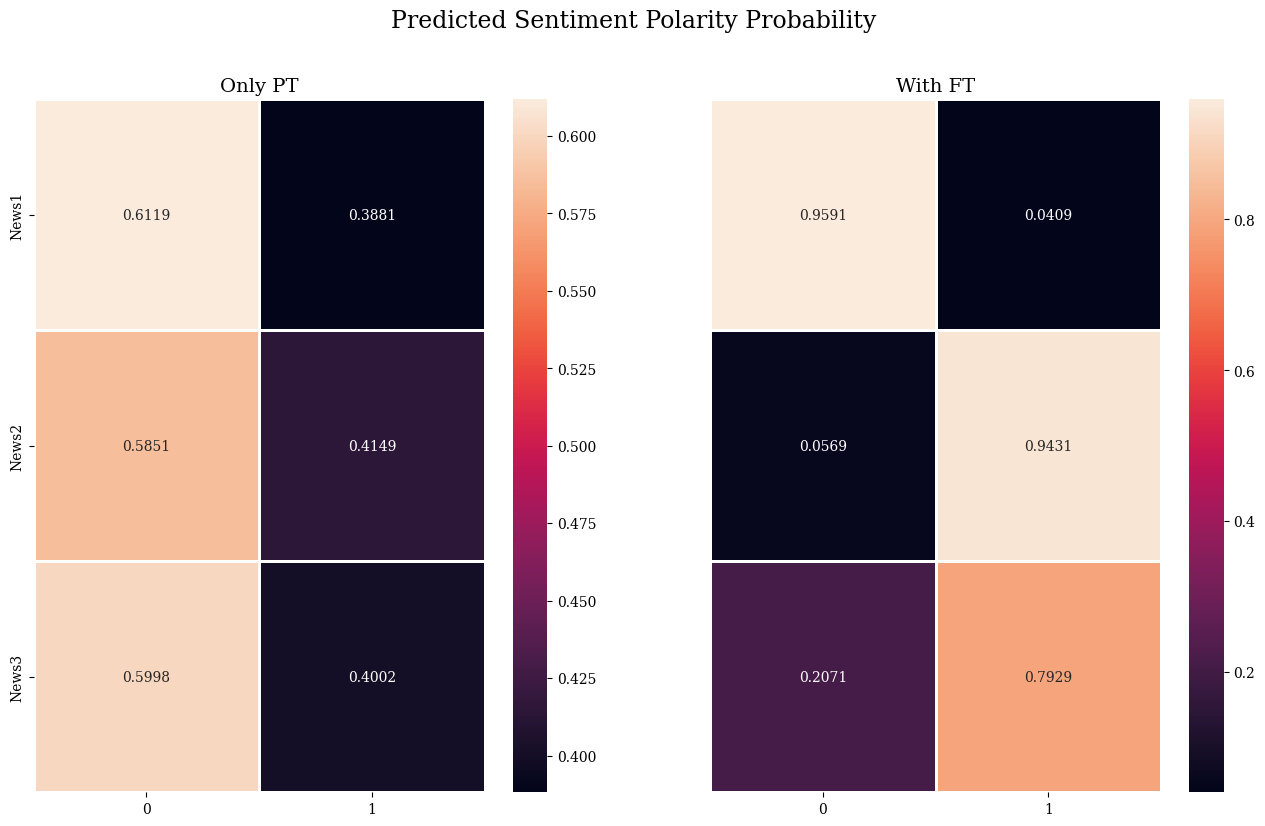

In [192]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
sns.heatmap(l1.detach().numpy(), annot=True, fmt=".4f", ax=ax1, linewidths=1.8, yticklabels=['News1', 'News2', 'News3'])
sns.heatmap(l2.detach().numpy(), annot=True, fmt=".4f", ax=ax2, linewidths=1.8, yticklabels='')
plt.suptitle("Predicted Sentiment Polarity Probability", fontsize=17)
ax1.set_title("Only PT", fontsize=14)
ax2.set_title("With FT", fontsize=14)
plt.savefig('/data1/brian/Quant/paper_figs/senti_prob.jpg', dpi=512, bbox_inches='tight')

# 五、新闻情感极性分析

In [230]:
sum(senti_rank['positive_ratio'] > 0.9) / 4556 * 100

1.5803336259877085

In [221]:
senti_rank_tmp = senti_rank.copy()
senti_rank_tmp['Text Type'] = 'Title+Summary'
senti_rank_tmp['Sector'] = senti_rank_tmp['code'].map(lambda x: x[:2])
senti_rank_title_tmp = senti_rank_title.copy()
senti_rank_title_tmp['Text Type'] = 'Only Title'
senti_rank_title_tmp['Sector'] = senti_rank_title_tmp['code'].map(lambda x: x[:2])

df = pd.concat([senti_rank_tmp, senti_rank_title_tmp], axis=0)[['positive_ratio', 'Text Type', 'Sector']]
df

,positive_ratio,Text Type,Sector
2966,0.993031,Title+Summary,68
4488,0.982394,Title+Summary,00
1555,0.979622,Title+Summary,60
99,0.978701,Title+Summary,60
1263,0.978166,Title+Summary,68
...,...,...,...
3908,0.102857,Only Title,30
2582,0.095506,Only Title,68
3107,0.092342,Only Title,30
211,0.078571,Only Title,68


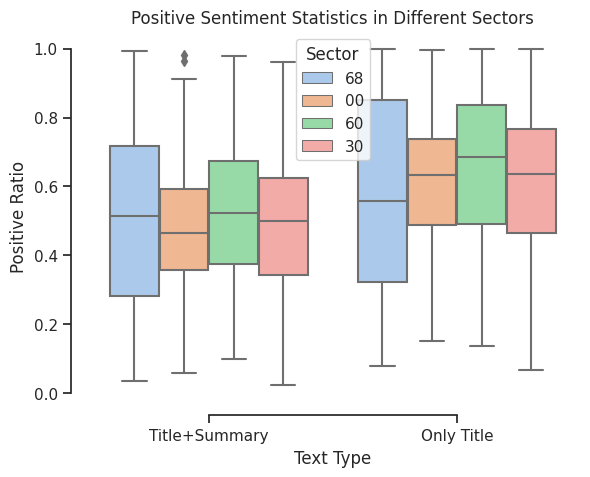

In [222]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(y="positive_ratio", x="Text Type", data=df,
            hue="Sector", width=0.8)
sns.despine(offset=10, trim=True)
plt.ylabel('Positive Ratio')
plt.title("Positive Sentiment Statistics in Different Sectors")
plt.savefig('/data1/brian/Quant/paper_figs/senti_stats.jpg', dpi=512, bbox_inches='tight')